# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [152]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\Advertising.csv")

In [153]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop(columns="sales", axis=1)
y = df["sales"]

### Polynomial Conversion

In [6]:
from sklearn.preprocessing import PolynomialFeatures

We create a deliberate overfitting situation by applying polynomial features with a degree of 5 to demonstrate regularisation afterwards.

In [7]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False).set_output(transform="pandas")

poly_features = polynomial_converter.fit_transform(X)

# Now we will try to get rid of this overfitting situation.

In [8]:
poly_features.shape

(200, 55)

In [9]:
poly_features.head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888,2.803280e+09,4.605127e+08,8.430551e+08,7.565138e+07,1.384941e+08,2.535394e+08,1.242774e+07,2.275131e+07,4.165054e+07,7.624913e+07,2.041584e+06,3.737503e+06,6.842200e+06,1.252593e+07,2.293107e+07,6.450347e+11,1.059640e+11,1.939870e+11,1.740738e+10,3.186748e+10,5.833941e+10,2.859622e+09,5.235075e+09,9.583789e+09,1.754493e+10,4.697684e+08,8.599993e+08,1.574390e+09,2.882217e+09,5.276440e+09,7.717187e+07,1.412776e+08,2.586352e+08,4.734803e+08,8.667946e+08,1.586830e+09
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851,3.921390e+06,3.463160e+06,3.974263e+06,3.058476e+06,3.509855e+06,4.027848e+06,2.701081e+06,3.099714e+06,3.557178e+06,4.082156e+06,2.385449e+06,2.737500e+06,3.141508e+06,3.605140e+06,4.137197e+06,1.745019e+08,1.541106e+08,1.768547e+08,1.361022e+08,1.561885e+08,1.792392e+08,1.201981e+08,1.379373e+08,1.582944e+08,1.816560e+08,1.061525e+08,1.218188e+08,1.397971e+08,1.604287e+08,1.841053e+08,9.374816e+07,1.075838e+08,1.234613e+08,1.416820e+08,1.625918e+08,1.865876e+08
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557,8.752131e+04,2.335598e+05,3.526294e+05,6.232787e+05,9.410286e+05,1.420769e+06,1.663284e+06,2.511233e+06,3.791470e+06,5.724376e+06,4.438648e+06,6.701489e+06,1.011793e+07,1.527610e+07,2.306391e+07,1.505366e+06,4.017228e+06,6.065226e+06,1.072039e+07,1.618569e+07,2.443722e+07,2.860849e+07,4.319321e+07,6.521328e+07,9.845927e+07,7.634475e+07,1.152656e+08,1.740285e+08,2.627489e+08,3.966993e+08,2.037340e+08,3.075983e+08,4.644132e+08,7.011728e+08,1.058633e+09,1.598329e+09
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625,5.268058e+08,1.436111e+08,2.034201e+08,3.914942e+07,5.545378e+07,7.854834e+07,1.067242e+07,1.511710e+07,2.141285e+07,3.033055e+07,2.909378e+06,4.121032e+06,5.837298e+06,8.268327e+06,1.171180e+07,7.981108e+10,2.175708e+10,3.081814e+10,5.931138e+09,8.401248e+09,1.190007e+10,1.616871e+09,2.290241e+09,3.244046e+09,4.595078e+09,4.407708e+08,6.243364e+08,8.843506e+08,1.252652e+09,1.774337e+09,1.201573e+08,1.701986e+08,2.410804e+08,3.414819e+08,4.836971e+08,6.851400e+08
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704,1.068547e+09,6.382915e+07,3.451502e+08,3.812803e+06,2.061738e+07,1.114866e+08,2.277559e+05,1.231569e+06,6.659596e+06,3.601115e+07,1.360489e+04,7.356718e+04,3.978077e+05,2.151108e+06,1.163192e+07,1.931933e+11,1.154031e+10,6.240316e+10,6.893548e+08,3.727622e+09,2.015677e+10,4.117827e+07,2.226677e+08,1.204055e+09,6.510816e+09,2.459764e+06,1.330095e+07,7.192364e+07,3.889204e+08,2.103051e+09,1.469328e+05,7.945256e+05,4.296323e+06,2.323197e+07,1.256247e+08,6.793041e+08


### Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)   

## Scaling the Data

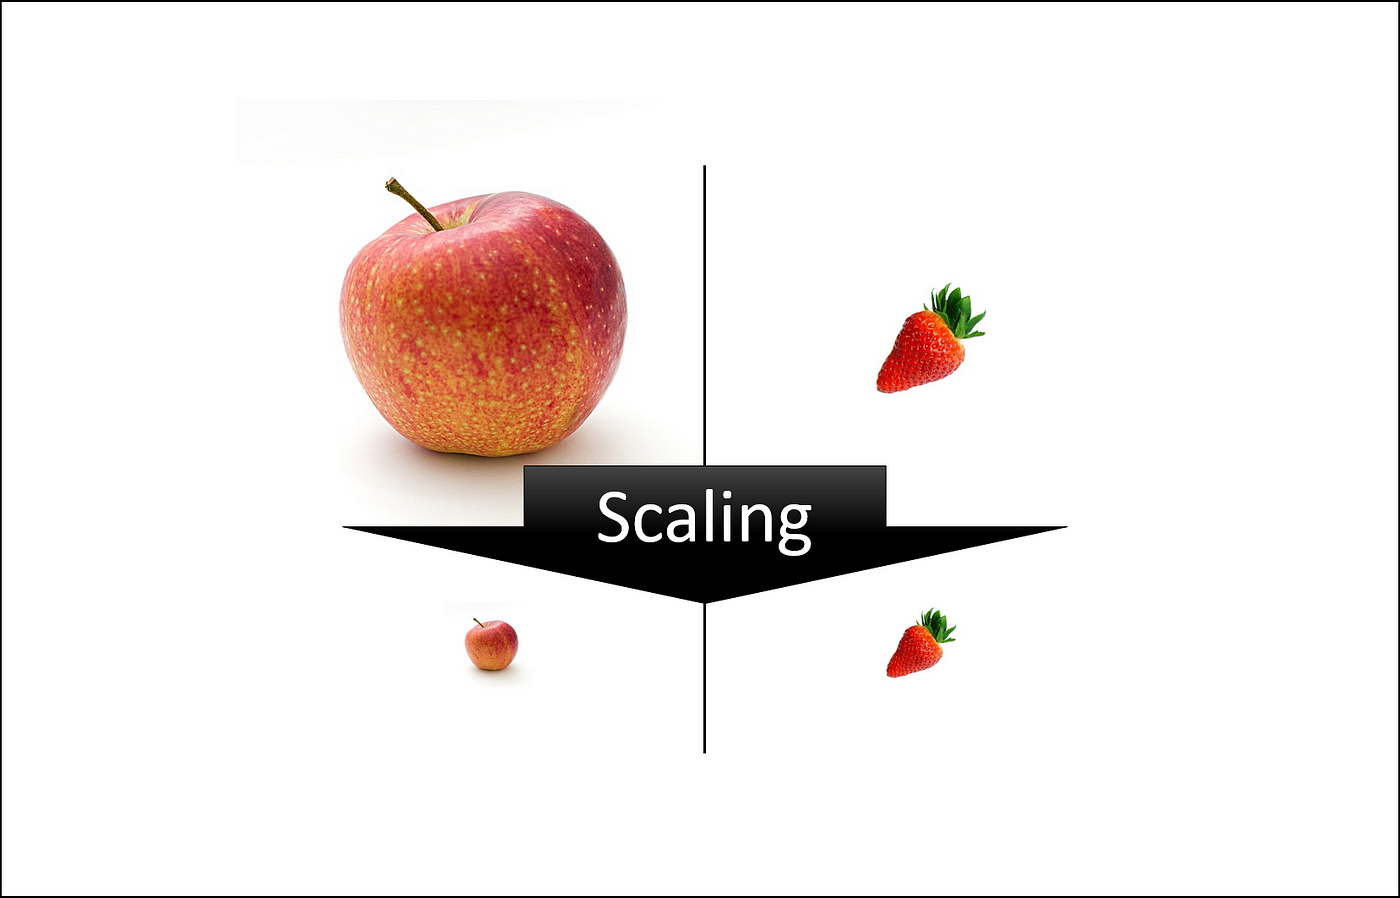

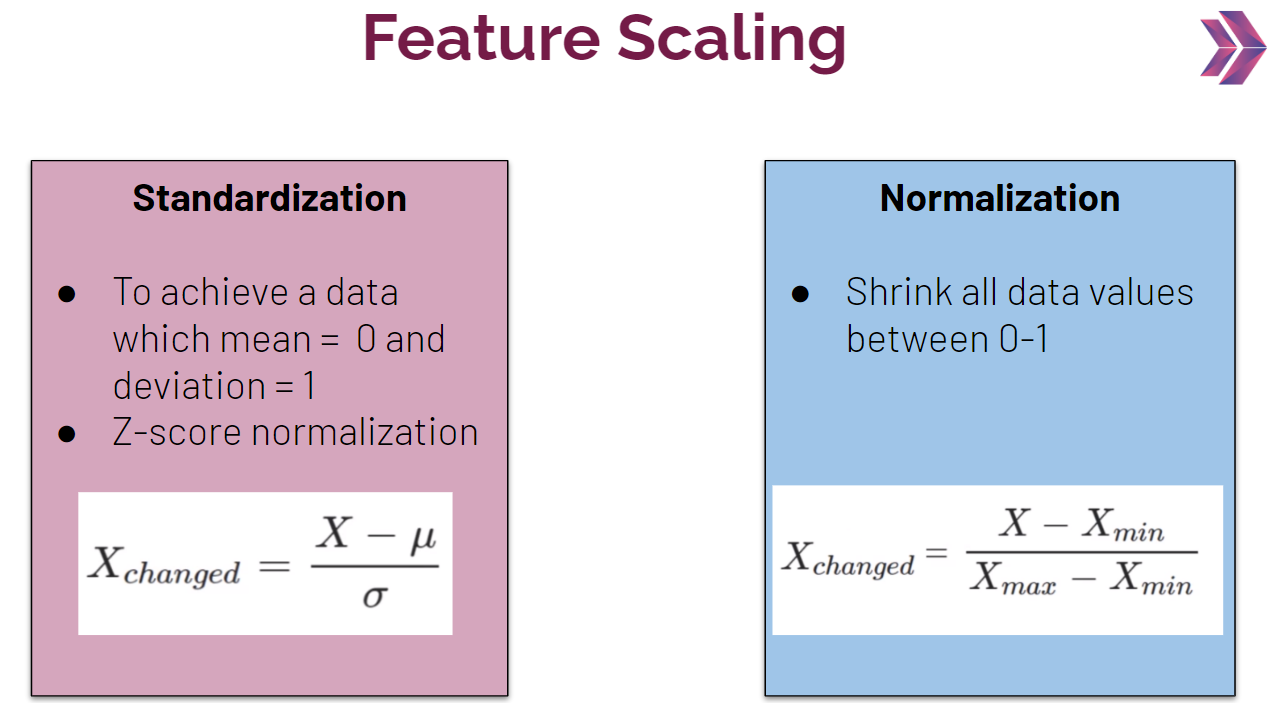

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler().set_output(transform="pandas")

# These scalers that we imported above are the most widely used scalers. 
# MinMaxScaler is generally used when a featue has a fixed range of values.
# StandardScaler is more robust to outliers than MinMaxScaler. StandardScaler is a better choice for normally distributed data.
# RobustScaler is even more robust to outliers than StandardScaler.
# You can try all of them and go with the best performing scaler.

In [13]:
scaler.fit(X_train) #scaler.fit_transform(X_train)

# The fit method is only used to learn parameters from the fitted data. It never changes the data itself.
# The transform method is used to generate a new representation of the data. w.r.t. scalers, the transform method is the method
# that actually scales/transforms the data.

# Remember to only fit the train set to prevent data/information leakage. We will use the parameters learnt from the train set to transform both the train and test sets.

StandardScaler()

In [14]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0


In [15]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

# transforming the train set with the parameters learnt from the train set.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
79,-0.404248,-1.028237,-0.337675,-0.634400,-0.786925,-0.395055,-0.937486,-0.699431,-0.489214,-0.695583,-0.689593,-0.475068,-0.734348,-0.559474,-0.406922,-0.801311,-0.679677,-0.564622,-0.460938,-0.678602,-0.620177,-0.482916,-0.607982,-0.474507,-0.372931,-0.642471,-0.546065,-0.433834,-0.337930,-0.696260,-0.614565,-0.542416,-0.455422,-0.374119,-0.633700,-0.558842,-0.454315,-0.527486,-0.414699,-0.337204,-0.533232,-0.445546,-0.353518,-0.279617,-0.567881,-0.509494,-0.427442,-0.328178,-0.257194,-0.619036,-0.557162,-0.507670,-0.440180,-0.358173,-0.289307
197,0.320608,-0.919828,-1.161439,0.068474,-0.559530,-0.726190,-0.900088,-0.832244,-0.800551,-0.135381,-0.474022,-0.563015,-0.676516,-0.614635,-0.563894,-0.790943,-0.700468,-0.624532,-0.558017,-0.273539,-0.451333,-0.484560,-0.556104,-0.485449,-0.435558,-0.628659,-0.554031,-0.465040,-0.385441,-0.693692,-0.617655,-0.553268,-0.474949,-0.401070,-0.356907,-0.438271,-0.432586,-0.487841,-0.410766,-0.360048,-0.521387,-0.446092,-0.365682,-0.298984,-0.564743,-0.510452,-0.433313,-0.337986,-0.269501,-0.618442,-0.557584,-0.509566,-0.443912,-0.363706,-0.296229
38,-1.270511,0.259124,0.254251,-1.090519,-0.709132,-0.644839,-0.038813,0.152655,-0.047850,-0.903790,-0.751610,-0.670871,-0.570765,-0.451537,-0.432197,-0.247534,-0.077046,-0.102014,-0.212152,-0.768483,-0.662359,-0.579320,-0.593697,-0.488011,-0.424881,-0.523921,-0.425785,-0.362061,-0.323028,-0.369285,-0.238099,-0.215384,-0.231662,-0.256711,-0.671497,-0.579141,-0.496358,-0.531119,-0.429898,-0.364893,-0.515072,-0.431461,-0.351886,-0.290124,-0.494248,-0.424908,-0.361485,-0.292246,-0.245016,-0.429720,-0.332404,-0.298788,-0.281579,-0.260734,-0.240083
24,-1.042359,-0.696233,-0.574446,-1.010936,-0.819610,-0.724630,-0.800719,-0.640280,-0.614798,-0.881049,-0.752407,-0.666227,-0.713680,-0.593713,-0.524790,-0.755291,-0.640550,-0.562841,-0.510812,-0.762606,-0.658478,-0.574637,-0.612911,-0.505517,-0.435382,-0.631401,-0.543171,-0.450134,-0.373923,-0.682209,-0.599644,-0.534100,-0.459159,-0.390551,-0.670066,-0.577618,-0.494758,-0.533033,-0.431344,-0.365559,-0.532225,-0.449138,-0.364435,-0.297071,-0.563899,-0.506251,-0.428132,-0.333925,-0.266986,-0.614975,-0.552352,-0.503833,-0.438904,-0.360154,-0.294077
122,0.879103,-1.387343,-0.707629,0.809652,-0.894325,-0.220625,-1.011088,-0.857022,-0.672642,0.665229,-0.670291,-0.098886,-0.772674,-0.626372,-0.428138,-0.814507,-0.712282,-0.621267,-0.529577,0.503815,-0.556332,-0.079053,-0.621789,-0.485161,-0.319505,-0.650174,-0.564213,-0.460204,-0.357830,-0.698516,-0.620479,-0.554095,-0.473540,-0.395591,0.350326,-0.486377,-0.091050,-0.530334,-0.403958,-0.265467,-0.536619,-0.452536,-0.360808,-0.276592,-0.569253,-0.513099,-0.433917,-0.336493,-0.264625,-0.619413,-0.558183,-0.509832,-0.443916,-0.363384,-0.295266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.485591,-0.804643,-0.012116,-1.138993,-0.973636,-0.809745,-0.852638,-0.532414,-0.268987,-0.912850,-0.800665,-0.708050,-0.760775,-0.627568,-0.521376,-0.775244,-0.623011,-0.474720,-0.349314,-0.770031,-0.670751,-0.586123,-0.627579

In [16]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# transforming the test set with the parameters learnt from the train set.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
95,0.157812,0.591127,1.132275,-0.114868,0.501839,0.880627,0.353971,0.976877,0.942058,-0.302771,0.158990,0.401666,0.337004,0.819003,0.727898,0.125682,0.631281,0.790472,0.631098,-0.410366,-0.084044,0.080513,0.092937,0.398479,0.343342,0.145361,0.561430,0.631080,0.443166,-0.052537,0.335074,0.524736,0.512312,0.344390,-0.461301,-0.230245,-0.108198,-0.091576,0.110570,0.090933,-0.014002,0.252489,0.292597,0.184963,-0.011517,0.323009,0.445925,0.369891,0.211211,-0.178928,0.109458,0.284943,0.334940,0.265261,0.140423
15,0.539253,1.681996,1.132275,0.337942,1.758352,1.244150,2.109423,1.932643,0.942058,0.133922,1.282571,0.887210,2.268111,2.021222,0.985919,2.420270,2.352049,1.514527,0.631098,-0.032511,0.847699,0.556936,1.727686,1.469767,0.685542,2.625413,2.509365,1.518935,0.606359,2.655427,2.666437,1.904790,1.015578,0.344390,-0.155501,0.503511,0.300685,1.201706,0.976738,0.418695,2.038751,1.852671,1.060922,0.394357,2.895792,2.928441,1.965992,0.940915,0.305727,2.832732,2.908164,2.223861,1.330910,0.585735,0.140423
30,1.697834,0.367533,0.653801,2.210225,1.446811,1.740087,0.082183,0.472919,0.352960,2.617979,1.979093,2.231483,0.827560,1.283924,0.985381,-0.139297,0.166932,0.218113,0.088624,2.954287,2.364243,2.560222,1.234789,1.646505,1.251161,0.374885,0.758640,0.709539,0.423927,-0.282981,-0.060023,0.022696,0.006309,-0.069618,3.235265,2.666646,2.793719,1.524320,1.869079,1.399806,0.671615,1.035556,0.902232,0.549681,0.074267,0.366582,0.410156,0.281226,0.113945,-0.365651,-0.207460,-0.129135,-0.103776,-0.113212,-0.137646
158,-1.643633,0.950233,0.752455,-1.158188,-0.926300,-0.855485,0.853150,0.972657,0.464692,-0.914821,-0.802759,-0.717914,-0.672248,-0.565585,-0.516059,0.682777,0.853474,0.580885,0.182964,-0.770219,-0.671232,-0.587259,-0.624573,-0.519313,-0.446216,-0.559842,-0.472662,-0.402915,-0.349930,0.502593,0.679602,0.519886,0.244061,-0.003811,-0.671766,-0.580567,-0.497603,-0.536741,-0.435326,-0.368490,-0.532775,-0.450569,-0.366135,-0.298440,-0.494975,-0.431732,-0.371724,-0.301421,-0.251251,0.336963,0.502498,0.414078,0.218564,0.027749,-0.097374
128,0.835137,1.770079,-1.319286,0.745003,2.203573,-0.817781,2.282269,-0.723076,-0.819965,0.588207,1.921918,-0.599048,2.846693,-0.483488,-0.578239,2.692057,-0.518818,-0.622590,-0.559863,0.421700,1.564958,-0.488261,2.532306,-0.366555,-0.443908,3.353177,-0.345457,-0.461752,-0.386787,3.036279,-0.405060,-0.545139,-0.475125,-0.401220,0.268655,1.218717,-0.419590,2.092350,-0.309762,-0.364484,3.012108,-0.267574,-0.362198,-0.299797,3.780957,-0.258805,-0.424072,-0.338058,-0.269604,3.329500,-0.324695,-0.499019,-0.443616,-0.363732,-0.296240
115,-0.890258,0.821497,1.122409,-0.941772,-0.262821,-0.121428,0.665317,1.170860,0.928711,-0.855493,-0.581905,-0.485913,-0.150476,0.084512,0.014384,0.463133,0.930233,0.931499,0.617638,-0.754132,-0.608198,-0.522742,-0.442154,-0.308751,-0.282833,-0.153240,0.067295,0.086536,-0.009548,0.273666,0.673024,0.759508,0.606230,0.333178,-0.667437,-0.563220,-0.480259,-0.483820,-0.376917,-0.324252,-0.386739,-0.271981,-0.215211,-0.198584,-0.183244,0.007337,0.058457,0.018314,-0.051812,0.114825,0.442793,0.561937,0.500787,0.322462,0.132230
69,0.793547,1.424524,-0.135434,0.684840,1.817833,0.293710,1.630827,0.440959,-0.358884,0.517691,1.56

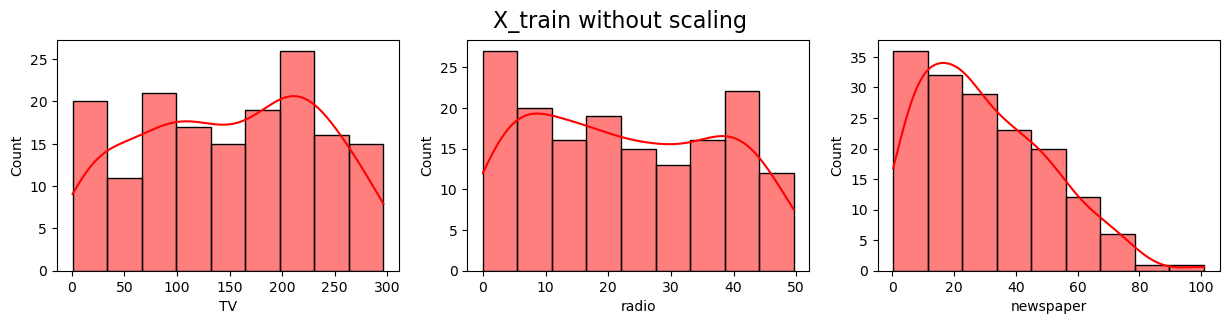

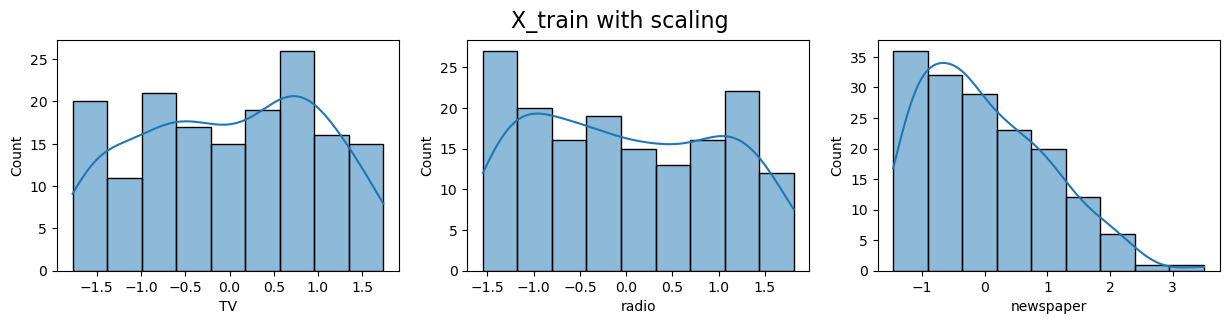

In [17]:
fig ,ax = plt.subplots(1,3,figsize=(15,3))
fig.suptitle('X_train without scaling', fontsize=16)

for i in range(3):
    sns.histplot(X_train.iloc[:,i], kde=True, ax=ax[i], color='r')
    ax[i].set_xlabel(X.columns[i])

fig ,ax = plt.subplots(1,3,figsize=(15,3))
fig.suptitle('X_train with scaling', fontsize=16)

for i in range(3):
    sns.histplot(X_train_scaled.iloc[:,i], kde=True, ax=ax[i])
    ax[i].set_xlabel(X.columns[i])


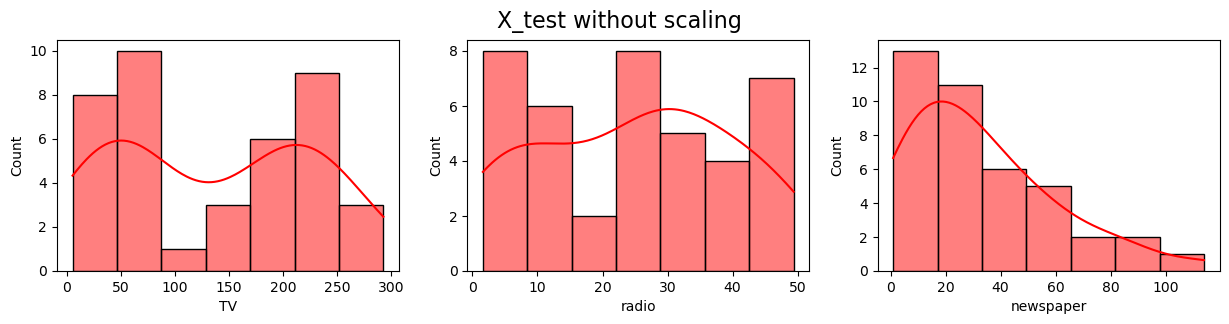

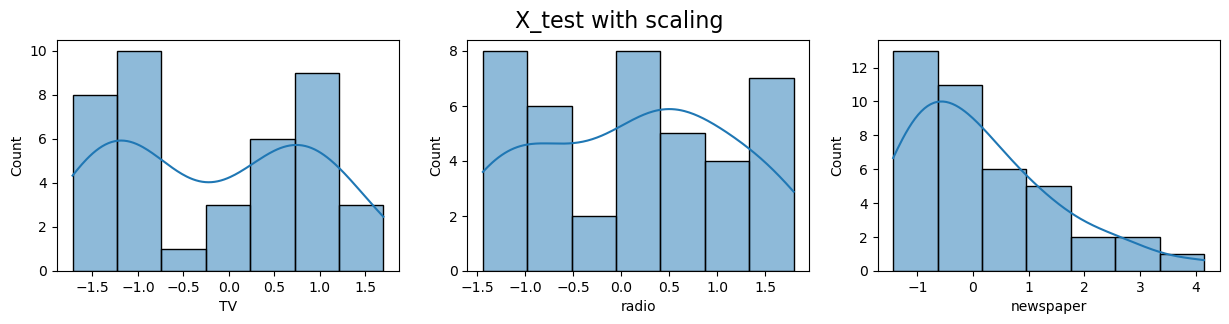

In [18]:
fig ,ax = plt.subplots(1,3,figsize=(15,3))
fig.suptitle('X_test without scaling', fontsize=16)

for i in range(3):
    sns.histplot(X_test.iloc[:,i], kde=True, ax=ax[i], color="r")
    ax[i].set_xlabel(X.columns[i])

fig ,ax = plt.subplots(1,3,figsize=(15,3))
fig.suptitle('X_test with scaling', fontsize=16)

for i in range(3):
    sns.histplot(X_test_scaled.iloc[:,i], kde=True, ax=ax[i])
    ax[i].set_xlabel(X.columns[i])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [19]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

# Since we transformed the train set with the parameters learnt from the train set itself, we can expect that the scaled train set to strictly have a mean of 0 and unit standard deviation.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003


In [20]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

# Whereas in the test set, since it's been scaled with the parameters learnt from the train set and not the test set, the resulting data will not strictly have
# a mean of 0 and unit standard deviation. Which is totally expected and normal.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
mean,-0.177,0.132,0.15,-0.124,-0.013,0.078,0.134,0.132,0.309,-0.096,-0.005,0.081,0.037,0.053,0.172,0.129,0.121,0.253,0.454,-0.084,-0.004,0.079,0.029,0.041,0.130,0.060,0.045,0.094,0.203,0.126,0.103,0.231,0.379,0.579,-0.08,-0.012,0.072,0.014,0.029,0.104,0.042,0.023,0.048,0.124,0.076,0.038,0.076,0.109,0.207,0.127,0.086,0.203,0.355,0.497,0.682
std,1.087,1.023,1.33,1.021,1.074,1.200,1.051,1.239,1.701,0.975,1.004,1.140,1.069,1.028,1.203,1.092,1.185,1.605,2.209,0.946,0.920,1.070,0.961,0.923,1.057,1.101,0.996,0.971,1.158,1.133,1.153,1.537,2.113,2.781,0.93,0.853,1.003,0.834,0.826,0.929,0.966,0.853,0.806,0.916,1.149,1.012,0.952,0.897,1.102,1.171,1.140,1.467,2.036,2.708,3.371


## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [22]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred),
    "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mape": mean_absolute_percentage_error(y_train, y_train_pred)},

    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred),
    "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
    "mape": mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [25]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

# In order to be able to compare the results we get from different models, we will assign the results into their own variables to access them later on.

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499
mape,0.016407,0.178759


## Multicollinearity

If there is a strong correlation between the independent variables, this situation is called **multicollineraty**.

**Multicollineraty** prevents the model from detecting important features.

In [26]:
def color_red(val):

    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'blue'
    return f'color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

# This function will return the correlation between independent features coloured based on their correlation strength.
# If the correlation is between (-0.90, +0.90), the value will be coloured red, otherwise black.

# Linear models (linear regression, ridge, lasso, elasticnet, logistic regression) are badly affected by multicollinearity.
# Regularisation models handle this problem gracefully as well as the overfitting situation.

C:\Users\serda\AppData\Local\Temp\ipykernel_14692\1191530324.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(poly_features).corr().style.applymap(color_red)


,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
TV,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
radio,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
newspaper,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
TV^2,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
TV radio,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
TV newspaper,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
radio^2,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376

### VIF Score for Multicollinearity

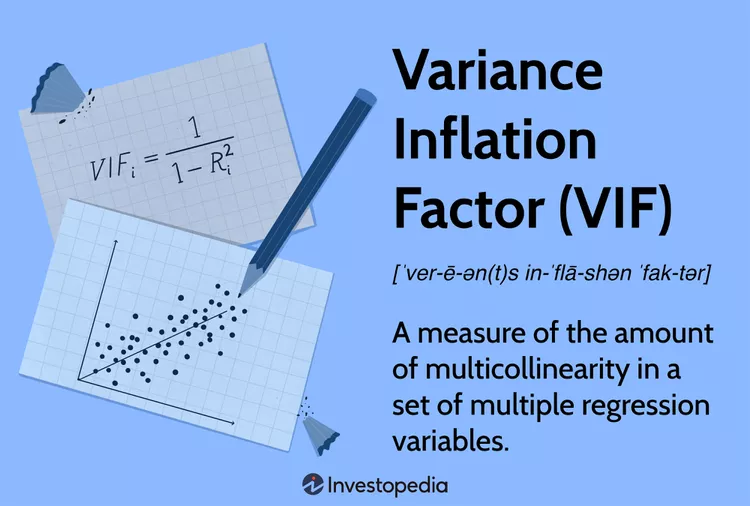

In [27]:
# conda install -c anaconda statsmodels
!pip install statsmodels

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
variance_inflation_factor

<function statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)>

In [30]:
df_predictors = df.drop('sales', axis=1)
predictors = df_predictors.columns

In [31]:
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

In [32]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df[predictors].values, i) for i in range(len(predictors))]

In [33]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [34]:
poly_features

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888,2.803280e+09,4.605127e+08,8.430551e+08,7.565138e+07,1.384941e+08,2.535394e+08,1.242774e+07,2.275131e+07,4.165054e+07,7.624913e+07,2.041584e+06,3.737503e+06,6.842200e+06,1.252593e+07,2.293107e+07,6.450347e+11,1.059640e+11,1.939870e+11,1.740738e+10,3.186748e+10,5.833941e+10,2.859622e+09,5.235075e+09,9.583789e+09,1.754493e+10,4.697684e+08,8.599993e+08,1.574390e+09,2.882217e+09,5.276440e+09,7.717187e+07,1.412776e+08,2.586352e+08,4.734803e+08,8.667946e+08,1.586830e+09
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851,3.921390e+06,3.463160e+06,3.974263e+06,3.058476e+06,3.509855e+06,4.027848e+06,2.701081e+06,3.099714e+06,3.557178e+06,4.082156e+06,2.385449e+06,2.737500e+06,3.141508e+06,3.605140e+06,4.137197e+06,1.745019e+08,1.541106e+08,1.768547e+08,1.361022e+08,1.561885e+08,1.792392e+08,1.201981e+08,1.379373e+08,1.582944e+08,1.816560e+08,1.061525e+08,1.218188e+08,1.397971e+08,1.604287e+08,1.841053e+08,9.374816e+07,1.075838e+08,1.234613e+08,1.416820e+08,1.625918e+08,1.865876e+08
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557,8.752131e+04,2.335598e+05,3.526294e+05,6.232787e+05,9.410286e+05,1.420769e+06,1.663284e+06,2.511233e+06,3.791470e+06,5.724376e+06,4.438648e+06,6.701489e+06,1.011793e+07,1.527610e+07,2.306391e+07,1.505366e+06,4.017228e+06,6.065226e+06,1.072039e+07,1.618569e+07,2.443722e+07,2.860849e+07,4.319321e+07,6.521328e+07,9.845927e+07,7.634475e+07,1.152656e+08,1.740285e+08,2.627489e+08,3.966993e+08,2.037340e+08,3.075983e+08,4.644132e+08,7.011728e+08,1.058633e+09,1.598329e+09
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625,5.268058e+08,1.436111e+08,2.034201e+08,3.914942e+07,5.545378e+07,7.854834e+07,1.067242e+07,1.511710e+07,2.141285e+07,3.033055e+07,2.909378e+06,4.121032e+06,5.837298e+06,8.268327e+06,1.171180e+07,7.981108e+10,2.175708e+10,3.081814e+10,5.931138e+09,8.401248e+09,1.190007e+10,1.616871e+09,2.290241e+09,3.244046e+09,4.595078e+09,4.407708e+08,6.243364e+08,8.843506e+08,1.252652e+09,1.774337e+09,1.201573e+08,1.701986e+08,2.410804e+08,3.414819e+08,4.836971e+08,6.851400e+08
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704,1.068547e+09,6.382915e+07,3.451502e+08,3.812803e+06,2.061738e+07,1.114866e+08,2.277559e+05,1.231569e+06,6.659596e+06,3.601115e+07,1.360489e+04,7.356718e+04,3.978077e+05,2.151108e+06,1.163192e+07,1.931933e+11,1.154031e+10,6.240316e+10,6.893548e+08,3.727622e+09,2.015677e+10,4.117827e+07,2.226677e+08,1.204055e+09,6.510816e+09,2.459764e+06,1.330095e+07,7.192364e+07,3.889204e+08,2.103051e+09,1.469328e+05,7.945256e+05,4.296323e+06,2.323197e+07,1.256247e+08,6.793041e+08
...,.

In [35]:
variance_inflation_factor(poly_features.values, 0)

15300.009324212066

In [36]:
# vif for polyfeatures

df_predictors = poly_features
predictors = poly_features.columns

vif_data = pd.DataFrame()
vif_data['Variable'] = predictors

# Calculate VIF scores for each predictor
vif_data["VIF"] = [variance_inflation_factor(df_predictors.values, i) for i in range(len(predictors))]
vif_data

,Variable,VIF
0,TV,15300.009324
1,radio,9422.757091
2,newspaper,9512.227417
3,TV^2,256780.846773
4,TV radio,52030.392396
5,TV newspaper,52799.227324
6,radio^2,150505.497128
7,radio newspaper,65190.155719
8,newspaper^2,133250.496537
9,TV^3,914638.082567


## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not. It answers the question of whether we can get similar scores in different parts of the data.

cross validation is only applied to the train set.

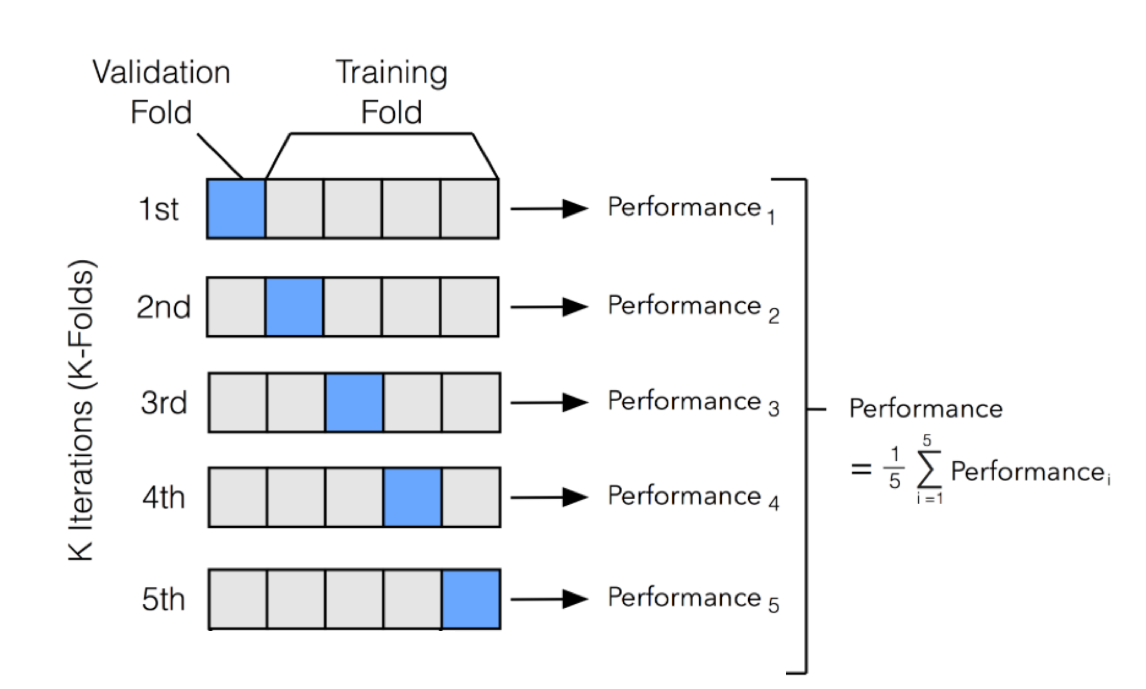

In [37]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

# These are the scorers that are implemented in scikit-learn that you can call by their string names. Their names must be exactly like the following, otherwise you'll get an error.
# The reason some metrics have neg_ preceding them is because scikit-learn algorithms are designed to maximise the metrics, but mae, mse and rmse metrics should be minimised so they worked
# around this issue implementing their negative versions in case of need.

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [38]:
from sklearn.model_selection import cross_validate, cross_val_score

# You can use either cross_validate or cross_val_score to cross validate your model. The nuance is that cross_val_score returns score for one single metric
# whereas cross_validate can return scores for multiple metrics if specified.

In [39]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

# Creating a brand new model for cross validation.

# Set return_train_score=True to get the train score results of cross validation as well.

In [40]:
scores
# The scores are returned as a dictionary.

{'fit_time': array([0.00452423, 0.00551748, 0.00299931, 0.00451684, 0.00400662,
        0.00451231, 0.00299931, 0.00351071, 0.00451469, 0.0045054 ]),
 'score_time': array([0.00699711, 0.00551677, 0.00450373, 0.00500965, 0.00651932,
        0.00600553, 0.00551295, 0.00500774, 0.0045073 , 0.00501776]),
 'test_r2': array([ 0.94345854,  0.98360242,  0.97961969, -5.69207862,  0.99353704,
         0.99682955,  0.9907342 ,  0.99244878,  0.97990659,  0.99041525]),
 'train_r2': array([0.99772768, 0.99798944, 0.99774108, 0.99785192, 0.99779843,
        0.99751821, 0.99776809, 0.99746136, 0.9977302 , 0.99781087]),
 'test_neg_mean_absolute_error': array([-0.38633232, -0.45398645, -0.43863405, -3.57023678, -0.30378975,
        -0.27952145, -0.33635204, -0.4075215 , -0.44307322, -0.26112228]),
 'train_neg_mean_absolute_error': array([-0.18751993, -0.16968183, -0.18401554, -0.1794792 , -0.17537787,
        -0.18448179, -0.17882463, -0.18987238, -0.18213515, -0.18638233]),
 'test_neg_mean_squared_erro

In [41]:
pd.DataFrame(scores, index = range(1,11))

# To make it easier to read, we turn the returned dictionary into a dataframe.

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.004524,0.006997,0.943459,0.997728,-0.386332,-0.187520,-0.283944,-0.060925,-0.532864,-0.246830,-0.044053,-0.015875
2,0.005517,0.005517,0.983602,0.997989,-0.453986,-0.169682,-0.390895,-0.051659,-0.625216,-0.227286,-0.039537,-0.013597
3,0.002999,0.004504,0.979620,0.997741,-0.438634,-0.184016,-0.364728,-0.060050,-0.603927,-0.245050,-0.027094,-0.016733
4,0.004517,0.005010,-5.692079,0.997852,-3.570237,-0.179479,-166.686869,-0.055581,-12.910727,-0.235755,-0.165026,-0.015593
5,0.004007,0.006519,0.993537,0.997798,-0.303790,-0.175378,-0.153806,-0.056749,-0.392181,-0.238220,-0.022285,-0.015572
6,0.004512,0.006006,0.996830,0.997518,-0.279521,-0.184482,-0.104168,-0.062363,-0.322751,-0.249726,-0.030215,-0.015889
7,0.002999,0.005513,0.990734,0.997768,-0.336352,-0.178825,-0.200500,-0.058872,-0.447772,-0.242635,-0.027310,-0.015652
8,0.003511,0.005008,0.992449,0.997461,-0.407521,-0.189872,-0.308899,-0.061348,-0.555787,-0.247685,-0.045339,-0.016473
9,0.004515,0.004507,0.979907,0.997730,-0.443073,-0.182135,-0.610626,-0.057327,-0.781426,-0.239430,-0.122011,-0.015417
10,0.004505,0.005018,0.990415,0.997811,-0.261122,-0.186382,-0.123434,-0.059946,-0.351331,-0.244838,-0.018469,-0.016424


In [42]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

# Return the mean of the metrics we got from cross validation.

test_r2                                      0.315847
train_r2                                     0.997740
test_neg_mean_absolute_error                -0.688057
train_neg_mean_absolute_error               -0.181777
test_neg_mean_squared_error                -16.922787
train_neg_mean_squared_error                -0.058482
test_neg_root_mean_squared_error            -1.752398
train_neg_root_mean_squared_error           -0.241746
test_neg_mean_absolute_percentage_error     -0.054134
train_neg_mean_absolute_percentage_error    -0.015723
dtype: float64

In [45]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

# Comparing train and test scores to diagnose overfitting/underfitting is not too bad of a method, but if we strictly take the test set as a reference to tune our model,
# we will end up overestimating the model performance in the most optimistic/ambitious way. Trying to diagnose overfitting/underfitting from CV results is the best way to go about it.
# Also, CV tells us much more about the consistency and reliability of the model as well as different parts of the dataset.

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499
mape,0.016407,0.178759


In [46]:
lm.coef_

# We will assign the coefficients of each model to their own variables to compare
# how regularisation affects the coefficients later on.

array([ 16.59727508,  -5.40405972,  -1.74928347, -62.33833778,
        16.90858661, -17.0396797 ,  18.33163138,  17.36342203,
        13.11462122, 111.07662344, -22.81391604,  44.26971429,
       -14.94945789, -26.02529709,  32.27766406, -29.6922559 ,
       -17.88079357, -30.82621205, -35.40557097, -93.69458809,
        27.30198689, -49.13969978, -10.86611732,  44.48527329,
       -55.26045722,  24.00912753,   1.98877056,  14.83064039,
       -16.4443257 ,  24.55166492,   2.88839217,  27.34790657,
        21.76432967,  42.14254255,  29.91636033, -12.96100179,
        20.98438147,  12.13988278, -26.82413453,  26.51197649,
        -7.92317222,   4.38181124,  -7.34055459,  14.14705248,
        -4.83551241,  -4.8904204 ,   2.54950883, -11.77617458,
         7.74633833, -10.15349317,   8.1863474 , -17.73958393,
         1.13383523,  -8.53196007, -20.74476395])

In [47]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,16.597275
1,-5.404060
2,-1.749283
3,-62.338338
4,16.908587
5,-17.039680
6,18.331631
7,17.363422
8,13.114621
9,111.076623


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting (If there is an underfiting caused by the alpha parameter) and overfiting.

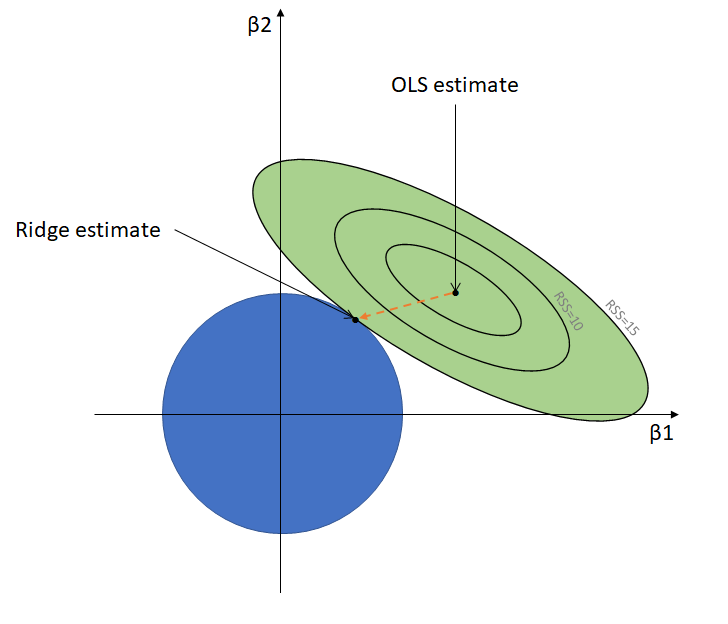

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge_model = Ridge(alpha=1)

# Alpha is the regularisation parameters. Higher the alpha, the stronger regularisation.

In [50]:
ridge_model.fit(X_train_scaled, y_train)

# Ridge, Lasso and ElasticNet strictly require the data to be scaled.


Ridge(alpha=1)

In [51]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [52]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs
   
# From first looks, it looks like ridge fixed the overfitting problem.
# We will do a cross validation to see how consistend and reliable the results are when tested with different parts of the data.

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486
mape,0.051186,0.056197


In [53]:
pd.concat([ls, rs], axis=1)

# As you can see in the comparison dataframe below, by adding some bias to the model with ridge, we actually overcame the overfitting problem
# that the vanilla linear regression was suffering from.

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997581,-1.423718,0.987205,0.984232
mae,0.187958,2.107643,0.364623,0.557799
mse,0.062748,76.501251,0.331859,0.497710
rmse,0.250495,8.746499,0.576072,0.705486
mape,0.016407,0.178759,0.051186,0.056197


## For Ridge Regression CV with alpha : 1

In [54]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2',
                             'neg_mean_absolute_error',
                             'neg_mean_squared_error',
                             'neg_root_mean_squared_error',
                             'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

# Doing a cross validation with the default alpha value.

In [55]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.005523,0.006503,0.909424,0.987075,-0.554577,-0.357851,-0.454859,-0.346534,-0.674433,-0.588671,-0.061241,-0.051584
2,0.004001,0.003506,0.988384,0.986841,-0.407609,-0.368516,-0.276898,-0.338107,-0.526211,-0.581470,-0.041159,-0.051925
3,0.003537,0.006024,0.985714,0.987132,-0.415267,-0.365436,-0.255661,-0.342068,-0.505629,-0.584866,-0.030740,-0.053416
4,0.002998,0.004503,0.920100,0.987767,-0.763229,-0.358082,-1.990155,-0.316532,-1.410728,-0.562611,-0.059484,-0.050979
5,0.003000,0.003009,0.995553,0.986184,-0.257907,-0.376688,-0.105827,-0.356141,-0.325311,-0.596775,-0.015457,-0.054915
6,0.002001,0.002999,0.977663,0.987187,-0.388813,-0.365154,-0.733912,-0.321978,-0.856687,-0.567431,-0.083017,-0.049857
7,0.004003,0.004511,0.992759,0.986392,-0.365033,-0.376714,-0.156693,-0.358936,-0.395845,-0.599113,-0.029527,-0.054253
8,0.002998,0.002516,0.993167,0.985360,-0.439520,-0.365369,-0.279522,-0.353782,-0.528698,-0.594796,-0.041201,-0.053248
9,0.002004,0.004522,0.915947,0.991464,-0.754910,-0.329176,-2.554330,-0.215583,-1.598227,-0.464309,-0.272261,-0.034898
10,0.002002,0.002507,0.985719,0.987017,-0.338109,-0.371542,-0.183907,-0.355516,-0.428843,-0.596251,-0.027503,-0.054186


In [56]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Since both the train and test scores look similar, we can conclude that the overfitting problem has been fixed.

test_r2                                     0.966443
train_r2                                    0.987242
test_neg_mean_absolute_error               -0.468497
train_neg_mean_absolute_error              -0.363453
test_neg_mean_squared_error                -0.699176
train_neg_mean_squared_error               -0.330518
test_neg_root_mean_squared_error           -0.725061
train_neg_root_mean_squared_error          -0.573629
test_neg_mean_absolute_percentage_error    -0.066159
train_neg_mean_absolute_percentage_error   -0.050926
dtype: float64

In [57]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

# We can also confirm that the test set scores are aligned with the CV results.

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486
mape,0.051186,0.056197


In [58]:
ridge_model.coef_

# As we mentioned before, we want to be able to compare the coefficients across different regularisation methods and strengths, we want to
# assign the coefficient values into its own variable.

array([ 3.71450604e+00,  6.75147866e-01,  2.45026233e-01, -1.03692214e+00,
        2.49619996e+00,  2.50747065e-01, -3.80972752e-02,  1.63781753e-01,
       -1.92793081e-01, -1.06022676e+00, -6.67857903e-02, -8.12695795e-01,
        1.25026950e+00,  4.88024688e-02,  1.10978317e-01, -3.07452443e-01,
        9.43623052e-02, -8.78442019e-02,  1.78689946e-04, -2.82098333e-01,
        1.79583653e-02, -2.63853784e-01, -4.24176994e-01, -2.44464854e-01,
       -1.13438874e-01,  6.99959186e-01, -1.51234093e-01, -8.44789444e-03,
        1.09260084e-01, -3.00740259e-01,  1.18474476e-01, -1.99970798e-02,
        1.00228457e-02,  6.94485746e-02,  4.49056790e-01,  4.73744361e-01,
        4.37318666e-01, -1.85196676e-01,  2.84736636e-01,  2.57367999e-01,
       -6.40738959e-01, -1.85031251e-01,  1.42459291e-01, -2.09667359e-03,
        4.09916098e-01, -2.01252496e-01,  3.47886931e-03,  6.83023968e-02,
       -1.15775095e-01, -1.65831448e-01,  1.58292458e-01,  3.60547037e-03,
        1.65384202e-03, -

In [59]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [60]:
pd.concat([lm_df,rm_df], axis = 1)

# As you can see, ridge actually suppressed all of the coefficients. The least important ones have been suppressed to values that are very close to zero, but never exactly zero.
# This is the main reason why we can't use ridge to do feature elimination.

,lm_coef,ridge_coef_1
0,16.597275,3.714506
1,-5.404060,0.675148
2,-1.749283,0.245026
3,-62.338338,-1.036922
4,16.908587,2.496200
5,-17.039680,0.250747
6,18.331631,-0.038097
7,17.363422,0.163782
8,13.114621,-0.192793
9,111.076623,-1.060227


## Choosing best alpha value with GridSearchCV for Ridge

In [61]:
from sklearn.model_selection import GridSearchCV

# We can use GridSearchCV to tune our hyperparameters. In the case of ridge, we only have one hypterparameter to tune. But if we had multiple hyperparameters, we could tune them all at once with GridSearchCV.

In [62]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

# GridSearchCV accepts a value space for each hyperparameter you want to tune.
# Here we create an alpha space which consists of linearly spaced 100 values starting from 0.01 to 1.

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [63]:
ridge_model = Ridge()

# Also, GridSearchCV requires the model that we want to tune the hyperparameters of.

In [64]:
param_grid = {"alpha":alpha_space}

# GridSearchCV accepts the hyperparameter names as dictionary keys, and their corresponding values as dictionary values in a key-value pair. The keys in your dictionary
# have to be the exact same hyperparameter names that the underlying model has.

In [65]:
grid_ridge = GridSearchCV(estimator = ridge_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2,
                          return_train_score=True)

# Set the scoring parameter to whatever metric you want to decide the best model on.

# This model will do a 10-fold cross validaton for every single hyparparameter value that it has to try, until all of the values have been exhausted.

# default CV parameter is 5.

In [66]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [67]:
grid_ridge.best_params_

# best_params_ attribute returns the best set/combination of parameters that gave the best result.

# In the scikit-learn API, object attributes that end with a trailing underscore tells us that they contain parameters that were learnt during the training/fitting.

{'alpha': 0.02}

In [68]:
pd.DataFrame(grid_ridge.cv_results_)

# We can also get all of the cv results as a dictionary by accessing the cv_results_ attribute. Turning it into a dataframe makes it easier to read.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002652,0.000593,0.001915,0.000482,0.01,{'alpha': 0.01},-0.578223,-0.592915,-0.666675,-1.058334,-0.410494,-0.547762,-0.408349,-0.458808,-1.321346,-0.342178,-0.638509,0.297040,2,-0.382896,-0.360878,-0.366435,-0.369102,-0.376968,-0.374656,-0.380412,-0.377063,-0.297768,-0.383230,-0.366941,0.024063
1,0.003152,0.000776,0.002153,0.000811,0.02,{'alpha': 0.02},-0.554132,-0.604376,-0.676790,-0.684998,-0.417295,-0.586006,-0.373666,-0.436309,-1.365495,-0.347477,-0.604654,0.278635,1,-0.411923,-0.389933,-0.392166,-0.396172,-0.406724,-0.401775,-0.411216,-0.406771,-0.313029,-0.411278,-0.394099,0.028076
2,0.003278,0.000554,0.002355,0.000502,0.03,{'alpha': 0.03},-0.548039,-0.614906,-0.673756,-0.992339,-0.425431,-0.612027,-0.354327,-0.427492,-1.387301,-0.351224,-0.638684,0.308187,3,-0.430880,-0.408884,-0.410037,-0.413233,-0.426121,-0.419026,-0.431557,-0.426938,-0.324125,-0.430098,-0.412090,0.030455
3,0.003057,0.000612,0.002103,0.000204,0.04,{'alpha': 0.04},-0.547655,-0.622293,-0.666758,-1.270073,-0.431859,-0.630645,-0.342303,-0.424330,-1.400078,-0.353994,-0.668999,0.351597,4,-0.444478,-0.422456,-0.423450,-0.425225,-0.440064,-0.431319,-0.446314,-0.441679,-0.332797,-0.443952,-0.425174,0.032012
4,0.002606,0.000585,0.001853,0.000637,0.05,{'alpha': 0.05},-0.549274,-0.627121,-0.658777,-1.472465,-0.436510,-0.644739,-0.334434,-0.423703,-1.408497,-0.356183,-0.691170,0.390933,5,-0.454824,-0.432793,-0.434010,-0.434218,-0.450684,-0.440650,-0.457626,-0.452988,-0.339875,-0.454689,-0.435236,0.033089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002909,0.000438,0.001852,0.000452,0.96,{'alpha': 0.9600000000000001},-0.670845,-0.528425,-0.507336,-1.436843,-0.327339,-0.851722,-0.393058,-0.525084,-1.592702,-0.426487,-0.725984,0.419765,12,-0.585714,-0.577994,-0.581532,-0.559192,-0.593344,-0.564462,-0.596094,-0.591707,-0.461441,-0.593184,-0.570467,0.038222
96,0.002853,0.000504,0.002105,0.000491,0.97,{'alpha': 0.97},-0.671750,-0.527857,-0.506899,-1.430224,-0.326808,-0.852973,-0.393762,-0.525993,-1.594097,-0.427080,-0.725744,0.418921,11,-0.586458,-0.578869,-0.582371,-0.560051,-0.594208,-0.565209,-0.596853,-0.592485,-0.462163,-0.593956,-0.571262,0.038241
97,0.002407,0.000493,0.002153,0.000550,0.98,{'alpha': 0.98},-0.672650,-0.527299,-0.506470,-1.423665,-0.326293,-0.854218,-0.394461,-0.526899,-1.595482,-0.427671,-0.725511,0.418093,10,-0.587199,-0.579740,-0.583206,-0.560908,-0.595067,-0.565953,-0.597610,-0.593258,-0.462882,-0.594724,-0.572055,0.038261
98,0.002605,0.000734,0.002212,0.000786,0.99,{'alpha': 0.99},-0.673544,-0.526750,-0.506046,-1.417167,-0.325794,-0.855455,-0.395155,-0.527800,-1.596859,-0.428259,-0.725283,0.417283,9,-0.587936,-0.580607,-0.584038,-0.561761,-0.595923,-0.566693,-0.598363,-0.594029,-0.463598,-0.595489,-0.572844,0.038281


In [69]:
grid_ridge.best_index_

# Returns the index of the best score.

1

In [70]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

# We get the best performing index and return its mean test and train scores.

# Since GridSearchCV also does the CV part for us, we don't need to cross validate the model again.

# The scores that we see here are the mean scores of 10-fold cross validation of the best performing hyperparameter set.

mean_test_score    -0.604654
mean_train_score   -0.394099
Name: 1, dtype: object

In [71]:
grid_ridge.best_score_

# This attribute only stores the best score of the validation set.

-0.6046542768939246

In [72]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

# Once the GridSearch is done, the grid model behaves like the underlying model fitted with the best hyperparameters that the gridsearch came up with.
# Hence, we can use the grid model directly to get the predictions.

In [73]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

# Our scores got even better after tuning the alpha. These are the scores that we got with the best alpha value.

,grid_ridge_train,grid_ridge_test
R2,0.993766,0.989353
mae,0.271564,0.410962
mse,0.161686,0.336050
rmse,0.402102,0.579698
mape,0.033544,0.038490


In [74]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698
mape,0.016407,0.178759,0.051186,0.056197,0.033544,0.038490


In [75]:
grid_ridge.best_estimator_.coef_

# We can access the attributes of the underlying model like so.

array([  7.45625463,   0.13786108,   1.16486714, -10.18153931,
         4.61608206,  -1.25503733,   0.33042816,   0.78901269,
        -1.77479528,   3.10639146,  -3.15252645,  -1.26649515,
         0.43831683,  -0.53218919,   1.18458917,  -0.21141339,
         0.38750327,  -1.35413514,   0.39189611,   4.3004558 ,
         4.40676019,   2.30597279,  -3.10358629,   1.78779727,
         0.09856193,   1.54687505,  -0.83217856,  -0.78611457,
         0.71354068,  -0.40265794,   0.1448194 ,   0.14369358,
         0.55987005,   1.42302118,  -2.84496696,  -2.01918122,
        -0.63602304,   3.14601169,  -2.10227164,  -0.54967264,
        -3.70340385,   1.65632943,   1.12644095,   0.03750742,
         2.39600492,  -0.49305799,  -0.53507419,  -0.14507989,
        -0.7541191 ,  -0.43272424,  -0.43997281,   0.07342927,
         0.79820263,  -0.4177175 ,  -0.92156695])

In [76]:
rgm_df = pd.DataFrame(grid_ridge.best_estimator_.coef_, columns=["ridge_coef_0.02"])

In [77]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

# As you can see in the following DF, when our regularisation strength is lower, the coefficients are allowed to grow bigger.

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,16.597275,3.714506,7.456255
1,-5.404060,0.675148,0.137861
2,-1.749283,0.245026,1.164867
3,-62.338338,-1.036922,-10.181539
4,16.908587,2.496200,4.616082
5,-17.039680,0.250747,-1.255037
6,18.331631,-0.038097,0.330428
7,17.363422,0.163782,0.789013
8,13.114621,-0.192793,-1.774795
9,111.076623,-1.060227,3.106391


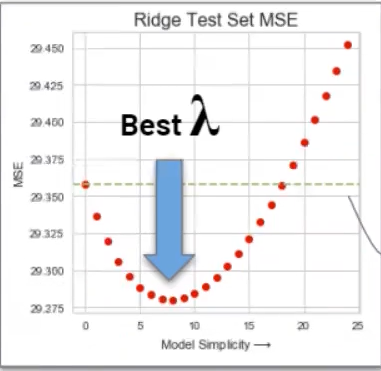

- Values greater than the best alpha value we found will distort our scores as shown in the graph above and cause underfitting after a certain stage.

## LASSO

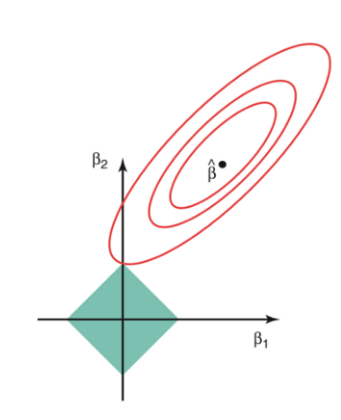

In [78]:
from sklearn.linear_model import Lasso

In [79]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

# Lasso also expects the features to be of the same scale. Otherwise, the results might be misleading.

Lasso(alpha=1)

In [80]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [81]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

# Looks like we fixed the overfitting sitaution of vanilla linear regression by using lasso as well, but the scores are worse than those of ridge.
# Kind of indicates that we have to tune the alpha value.

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074
mape,0.127897,0.126775


In [82]:
pd.concat([ls, rs, rgs, lss], axis = 1)

# We can clearly see, when we compare the scores, that lasso model is underfitting. Becuase we know that the model can actually do
# much better like in the case of ridge model.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074
mape,0.016407,0.178759,0.051186,0.056197,0.033544,0.038490,0.127897,0.126775


## For Lasso CV with Default Alpha : 1

In [83]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [84]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.002013,0.004000,0.706630,0.917901,-0.806709,-1.011725,-1.473267,-2.201218,-1.213782,-1.483650,-0.097636,-0.130667
2,0.002001,0.004002,0.918510,0.912366,-0.997634,-1.021604,-1.942615,-2.251644,-1.393777,-1.500548,-0.117421,-0.131752
3,0.002008,0.003500,0.962622,0.916147,-0.693933,-1.031761,-0.668914,-2.229095,-0.817872,-1.493015,-0.043634,-0.132774
4,0.002013,0.005000,0.933193,0.914841,-0.940894,-1.027563,-1.664037,-2.203442,-1.289976,-1.484399,-0.084903,-0.131350
5,0.004006,0.005528,0.928358,0.912803,-1.158430,-1.024222,-1.704932,-2.247654,-1.305730,-1.499218,-0.082657,-0.132511
6,0.002998,0.002590,0.866498,0.916798,-1.387719,-1.027112,-4.386342,-2.090716,-2.094360,-1.445931,-0.214397,-0.123312
7,0.003000,0.003031,0.928574,0.917464,-1.016796,-1.012382,-1.545570,-2.177084,-1.243209,-1.475495,-0.071958,-0.130528
8,0.002962,0.003038,0.941482,0.906374,-1.161680,-1.042144,-2.393813,-2.262532,-1.547195,-1.504172,-0.119715,-0.131729
9,0.002997,0.004998,0.811842,0.922793,-1.486293,-1.009553,-5.718008,-1.949948,-2.391236,-1.396405,-0.396930,-0.103456
10,0.002998,0.003001,0.905500,0.920835,-0.829083,-1.008444,-1.216981,-2.167804,-1.103169,-1.472346,-0.077737,-0.130035


In [85]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# we can confirm that the underfitting problem is consistent.

test_r2                                     0.890321
train_r2                                    0.915832
test_neg_mean_absolute_error               -1.047917
train_neg_mean_absolute_error              -1.021651
test_neg_mean_squared_error                -2.271448
train_neg_mean_squared_error               -2.178114
test_neg_root_mean_squared_error           -1.440031
train_neg_root_mean_squared_error          -1.475518
test_neg_mean_absolute_percentage_error    -0.130699
train_neg_mean_absolute_percentage_error   -0.127811
dtype: float64

In [86]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

# test set scores are aligned and consistent with CV scores.

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074
mape,0.127897,0.126775


In [87]:
lasso_model.coef_

# As you can see, lasso actually set the coefficients of majority of the features to be 0, whereas ridge mathematically cannot do that.
# This is the main reason why lasso is a better model to do feature elimination.

array([0.69600691, 0.        , 0.        , 0.        , 3.44893766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [88]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [89]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

# We should use the best lasso model to do the feature selection/elimination. As we can see, the current lasso
# model is underfitting, so it's definitely not the best performing lasso model.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,16.597275,3.714506,7.456255,0.696007
1,-5.404060,0.675148,0.137861,0.000000
2,-1.749283,0.245026,1.164867,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000
4,16.908587,2.496200,4.616082,3.448938
5,-17.039680,0.250747,-1.255037,0.000000
6,18.331631,-0.038097,0.330428,0.000000
7,17.363422,0.163782,0.789013,0.000000
8,13.114621,-0.192793,-1.774795,0.000000
9,111.076623,-1.060227,3.106391,0.000000


## Choosing best alpha value with GridSearchCV for Lasso

In [90]:
lasso_model = Lasso(max_iter=100000)

# Since lasso uses a gradient descent algorithm (coordinate descent to be exact), if the default max_iter value is not enough,
# you will get a warning. In that case, increase the max_iter value until the model converges without a warning.

In [91]:
param_grid = {"alpha":alpha_space}

In [92]:
grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=2,
                          return_train_score=True)

In [93]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [94]:
grid_lasso.best_params_

# Best hyperparameters

{'alpha': 0.01}

In [95]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005487,0.001106,0.001529,0.000453,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1,-0.577553,-0.569384,-0.571601,-0.573763,-0.581370,-0.569556,-0.585592,-0.577237,-0.449411,-0.586038,-0.564150,0.038673
1,0.005594,0.001194,0.001596,0.000486,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2,-0.649922,-0.638520,-0.636682,-0.632679,-0.648412,-0.641548,-0.644189,-0.638120,-0.537452,-0.643518,-0.631104,0.031617
2,0.003312,0.000639,0.001407,0.000441,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3,-0.690306,-0.712693,-0.713191,-0.697518,-0.723460,-0.678278,-0.715932,-0.707379,-0.551486,-0.713394,-0.690364,0.048034
3,0.002650,0.000394,0.001101,0.000372,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4,-0.707508,-0.730532,-0.728325,-0.718692,-0.738978,-0.694069,-0.732215,-0.723574,-0.569175,-0.729209,-0.707228,0.047681
4,0.003251,0.000840,0.001308,0.000397,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5,-0.745398,-0.749058,-0.744671,-0.740694,-0.755226,-0.734619,-0.749776,-0.743618,-0.614395,-0.753398,-0.733085,0.039976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001899,0.000373,0.001520,0.000576,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96,-1.451735,-1.467034,-1.461424,-1.451418,-1.466782,-1.412255,-1.443838,-1.469580,-1.362133,-1.440980,-1.442718,0.031345
96,0.002050,0.000152,0.000953,0.000572,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97,-1.459656,-1.475355,-1.469265,-1.459606,-1.474833,-1.420619,-1.451695,-1.478171,-1.370649,-1.448765,-1.450861,0.031251
97,0.002351,0.000442,0.001406,0.000442,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98,-1.467617,-1.483714,-1.477144,-1.467833,-1.482923,-1.429020,-1.459591,-1.486800,-1.379201,-1.456588,-1.459043,0.031161
98,0.002266,0.000544,0.001243,0.000390,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99,-1.475615,-1.492112,-1.485061,-1.476098,-1.491052,-1.437458,-1.467524,-1.495467,-1.387786,-1.464450,-1.467262,0.031075


In [96]:
grid_lasso.best_index_

# The best performing model is at the index of 0 in cv_results_.

0

In [97]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

# Confirm there's no overfitting

mean_test_score    -0.587542
mean_train_score    -0.56415
Name: 0, dtype: object

In [98]:
grid_lasso.best_score_

# validation set score

-0.5875421384283503

In [99]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [100]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

# train and test results of the cross validation algorithm are very close to each other.

,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776
mape,0.050335,0.043862


In [101]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

# As you can see, we actually got the best scores using only 11 features.
# In ML, one of our ultimate goals is to get the best scores using
# as few features as possible. If you add more features,
# you will be increasing the model complexity and training time.
# Hence, increasing the expenses.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776
mape,0.016407,0.178759,0.051186,0.056197,0.033544,0.038490,0.127897,0.126775,0.050335,0.043862


In [102]:
grid_lasso.best_estimator_.coef_

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [103]:
lgm_df = pd.DataFrame(grid_lasso.best_estimator_.coef_, columns=["lasso_coef_0.01"])

In [104]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

# The higher the regularisation strength of Lasso, the more features will end up with coefficients of 0.

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,16.597275,3.714506,7.456255,0.696007,4.554373
1,-5.404060,0.675148,0.137861,0.000000,0.413861
2,-1.749283,0.245026,1.164867,0.000000,0.143165
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363
4,16.908587,2.496200,4.616082,3.448938,3.487585
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000
6,18.331631,-0.038097,0.330428,0.000000,0.000000
7,17.363422,0.163782,0.789013,0.000000,0.053439
8,13.114621,-0.192793,-1.774795,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000


## Elastic net

In [105]:
from sklearn.linear_model import ElasticNet

# ElasticNet is a combination of Ridge and Lasso algorithms. It combines them both under the same model.

In [106]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

# Training the model with its default hyperparameters. l1_ratio determines the ratio of impacts of l1 and l2 regularisations in the resulting model.
# if l1_ratio=30%, then l2_ratio=70%. They always add up to 100% or 1.

ElasticNet(alpha=1)

In [107]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [108]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

# The worst results we got so far.

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714
mape,0.147973,0.147369


In [109]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

# comparing to the results of other models, we can clearly see that we're dealing with an underfitting situation here.

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858,0.894391,0.902784
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532,1.230023,1.386981
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103,2.739112,3.068501
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776,1.655026,1.751714
mape,0.016407,0.178759,0.051186,0.056197,0.033544,0.038490,0.127897,0.126775,0.050335,0.043862,0.147973,0.147369


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [110]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [111]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.547624,0.897592,-1.018845,-1.217323,-2.271774,-2.745742,-1.507240,-1.657028,-0.121579,-0.150604
2,0.903256,0.891193,-1.109199,-1.227869,-2.306241,-2.795681,-1.518631,-1.672029,-0.129268,-0.151580
3,0.918673,0.893717,-1.121764,-1.240289,-1.455439,-2.825352,-1.206416,-1.680878,-0.072866,-0.153279
4,0.904224,0.893572,-1.185324,-1.234836,-2.385598,-2.753766,-1.544538,-1.659447,-0.104730,-0.151543
5,0.892673,0.891558,-1.435062,-1.228221,-2.554173,-2.795263,-1.598178,-1.671904,-0.102545,-0.152746
6,0.851579,0.895025,-1.571109,-1.227911,-4.876523,-2.637847,-2.208285,-1.624145,-0.232344,-0.142507
7,0.898629,0.893113,-1.307859,-1.246585,-2.193529,-2.819385,-1.481057,-1.679102,-0.094363,-0.153662
8,0.939770,0.885983,-1.192495,-1.229844,-2.463854,-2.755299,-1.569667,-1.659909,-0.130306,-0.150186
9,0.779346,0.903876,-1.668970,-1.195380,-6.705541,-2.427733,-2.589506,-1.558118,-0.439296,-0.119481
10,0.857503,0.898304,-1.064891,-1.238105,-1.835097,-2.784778,-1.354658,-1.668766,-0.092829,-0.152167


In [112]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Confirm that there's no overfitting.

test_r2                                     0.849328
train_r2                                    0.894393
test_neg_mean_absolute_error               -1.267552
train_neg_mean_absolute_error              -1.228636
test_neg_mean_squared_error                -2.904777
train_neg_mean_squared_error               -2.734085
test_neg_root_mean_squared_error           -1.657818
train_neg_root_mean_squared_error          -1.653133
test_neg_mean_absolute_percentage_error    -0.152013
train_neg_mean_absolute_percentage_error   -0.147776
dtype: float64

In [113]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

# the test set scores are aligned with the CV results.

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714
mape,0.147973,0.147369


In [114]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [115]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [116]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.597275,3.714506,7.456255,0.696007,4.554373,0.856033
1,-5.404060,0.675148,0.137861,0.000000,0.413861,0.249294
2,-1.749283,0.245026,1.164867,0.000000,0.143165,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363,0.303972
4,16.908587,2.496200,4.616082,3.448938,3.487585,0.970325
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000,0.057918
6,18.331631,-0.038097,0.330428,0.000000,0.000000,0.012196
7,17.363422,0.163782,0.789013,0.000000,0.053439,0.000000
8,13.114621,-0.192793,-1.774795,0.000000,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000,0.000000


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
elastic_model = ElasticNet(max_iter=10000)

# ElasticNet uses gradient descent as well. Increase the max_iter if you get a warning about not enough iterations to converge.

In [119]:
param_grid = {"alpha":[0.001, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

# If there are more than one hyperparameter to search through, it's important to be a little conservative with the size of your hyparparameter space.
# GridSearchCV can be a very computationally expensive algorithm.
# Here in this case, the model will train 7x7x10=490 times. (7 alpha values, 7 l1 ratio values, 10-fold cross validation for each hyperparameter combination)

In [120]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2,
                          return_train_score=True)

# When provided with multiple hyperparameters to tune, GridSearchCV will try every single combination of all of the hyperparameter values
# and return the best performing set/combination of hyperparameter values.

In [121]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.139e+00, tolerance: 3.861e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.769e+00, tolerance: 3.700e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.506e-01, tolerance: 3.726e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.512e+00, tolerance: 3.712e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.327e+00, tolerance: 3.798e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+00, tolerance: 3.480e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.255e+00, tolerance: 3.943e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e-01, tolerance: 3.828e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.462e-01, tolerance: 3.798e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.760e-01, tolerance: 3.943e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.5; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.107e-01, tolerance: 3.828e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.512e-01, tolerance: 3.712e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e-01, tolerance: 3.798e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.263e-01, tolerance: 3.480e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.7; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e-01, tolerance: 3.618e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.001, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.583e-01, tolerance: 3.861e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.601e-01, tolerance: 3.700e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.966e-01, tolerance: 3.712e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.928e-01, tolerance: 3.618e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.815e-01, tolerance: 3.480e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.817e-01, tolerance: 3.943e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.001, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.771e-01, tolerance: 3.700e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.627e-01, tolerance: 3.828e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.538e-01, tolerance: 3.712e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.376e-01, tolerance: 3.618e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s


c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.576e-01, tolerance: 3.480e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\serda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.282e-01, tolerance: 3.943e-01
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.001, l1_ratio=1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ..........................alpha=0.012, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.001, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [122]:
grid_model.best_params_

# As we can see from the best performing hyperparameters, the elastic net model actually behaves entirely like a lasso model (l1=1) with alpha value of 0.01

{'alpha': 0.012, 'l1_ratio': 1}

In [123]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.081090,0.004199,0.001938,0.000558,0.001,0.1,"{'alpha': 0.001, 'l1_ratio': 0.1}",-0.567372,-0.627241,-0.600778,-1.984858,-0.442708,-0.697667,-0.319378,-0.438070,-1.434234,-0.369125,-0.748143,0.508790,14,-0.497563,-0.476575,-0.480816,-0.469521,-0.494636,-0.479501,-0.504462,-0.499333,-0.375039,-0.499908,-0.477735,0.036027
1,0.054634,0.017789,0.002148,0.000242,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",-0.535947,-0.622268,-0.578449,-1.848187,-0.446433,-0.658286,-0.313742,-0.433611,-1.387298,-0.365767,-0.718999,0.472519,13,-0.490262,-0.467364,-0.473983,-0.459602,-0.485643,-0.475772,-0.496384,-0.492739,-0.371117,-0.491700,-0.470457,0.035042
2,0.061240,0.017458,0.001806,0.000601,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7}",-0.514100,-0.627606,-0.564147,-1.782229,-0.449869,-0.640533,-0.312397,-0.425365,-1.366420,-0.360202,-0.704287,0.456140,12,-0.489340,-0.464795,-0.471630,-0.454513,-0.482635,-0.475074,-0.495549,-0.489304,-0.368129,-0.488871,-0.467984,0.035423
3,0.062013,0.018025,0.002022,0.000775,0.001,0.9,"{'alpha': 0.001, 'l1_ratio': 0.9}",-0.490080,-0.627462,-0.546142,-1.726808,-0.448059,-0.593800,-0.305367,-0.419566,-1.348039,-0.350667,-0.685599,0.444565,10,-0.484811,-0.457617,-0.462614,-0.450454,-0.473793,-0.465350,-0.482549,-0.475925,-0.366696,-0.477418,-0.459723,0.032724
4,0.055763,0.013297,0.002396,0.000660,0.001,0.95,"{'alpha': 0.001, 'l1_ratio': 0.95}",-0.475460,-0.623337,-0.538535,-1.697053,-0.442362,-0.575366,-0.302193,-0.415342,-1.340330,-0.344484,-0.675446,0.439097,9,-0.479646,-0.450868,-0.456334,-0.446560,-0.466693,-0.459592,-0.474406,-0.467573,-0.366569,-0.469092,-0.453733,0.030647
5,0.063793,0.013546,0.002159,0.000813,0.001,0.99,"{'alpha': 0.001, 'l1_ratio': 0.99}",-0.459316,-0.618760,-0.530473,-1.635838,-0.435175,-0.559902,-0.296723,-0.411562,-1.334957,-0.337884,-0.662059,0.427148,8,-0.472174,-0.441904,-0.447009,-0.442877,-0.457154,-0.453108,-0.464430,-0.458598,-0.364531,-0.459330,-0.446111,0.028637
6,0.069201,0.013670,0.002155,0.000551,0.001,1,"{'alpha': 0.001, 'l1_ratio': 1}",-0.454645,-0.617565,-0.529614,-1.611360,-0.433799,-0.556149,-0.297056,-0.410102,-1.332994,-0.336372,-0.657966,0.421877,7,-0.470153,-0.439282,-0.444349,-0.439967,-0.454670,-0.451085,-0.462214,-0.456071,-0.364153,-0.456830,-0.443877,0.028114
7,0.019167,0.003163,0.001764,0.000410,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,11,-0.635476,-0.635249,-0.635925,-0.619268,-0.649252,-0.615056,-0.646440,-0.643166,-0.509895,-0.643553,-0.623328,0.039255
8,0.004432,0.000620,0.001903,0.000729,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,6,-0.637576,-0.636172,-0.634850,-0.626907,-0.647415,-0.620292,-0.646463,-0.640583,-0.500182,-0.644001,-0.623444,0.041866
9,0.004987,0.001197,0.001960,0.000577,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,5,-0.631266,-0.630985,-0.629241,-0.624995,-0.640566,-0.617447,-0.640331,-0.632599,-0.496596,-0.638658,-0.618268,0.041117


In [124]:
grid_model.best_index_

13

In [125]:
pd.DataFrame(grid_model.cv_results_).loc[6, ["mean_test_score", "mean_train_score"]]

# The results are the same as with the lasso which is expected because the model is behaving like a lasso model.

mean_test_score    -0.657966
mean_train_score   -0.443877
Name: 6, dtype: object

In [126]:
grid_model.best_score_

# Scores on the validation set.

-0.6010243547141894

In [127]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=1)
y_train_pred = grid_model.predict(X_train_scaled)

In [128]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

# GridSearch scores are aligned with test scores.

,GridSearch_train,GridSearch_test
R2,0.986654,0.989039
mae,0.366455,0.465941
mse,0.346144,0.345981
rmse,0.588340,0.588201
mape,0.052134,0.046018


## Final Model

In [129]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

# We will create the final model. Since we will be using the entire dataset this time, do the preprocessing on the entire dataset the same way.

In [130]:
final_model = Lasso(alpha=0.01) #grid_lasso

# This was the best scoring model so we instantiate it with the best performing hyperparameters.

In [131]:
final_model.fit(X_scaled, y)

# Train the model on the entire dataset this time.

Lasso(alpha=0.01)

## Prediction

In [132]:
poly_features.describe()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,147.042500,23.264000,30.554000,28955.591950,3490.309900,4598.126400,760.539300,824.73275,1405.48370,6.371006e+06,7.033242e+05,9.270578e+05,115027.471030,1.249737e+05,2.155203e+05,28201.560860,29000.037585,42395.923715,8.088636e+04,1.488750e+09,1.571115e+08,2.080740e+08,2.342036e+07,2.571906e+07,4.474803e+07,4.289267e+06,4.402545e+06,6.410803e+06,1.245402e+07,1.117126e+06,1.120125e+06,1.555293e+06,2.610234e+06,5.430220e+06,3.618416e+11,3.708842e+10,4.945291e+10,5.270270e+09,5.884132e+09,1.032756e+10,8.774591e+08,9.148286e+08,1.349155e+09,2.644550e+09,1.706345e+08,1.697752e+08,2.331168e+08,3.884481e+08,8.270956e+08,4.612487e+07,4.546380e+07,6.115584e+07,9.775189e+07,1.821850e+08,4.104483e+08
std,85.854236,14.846809,21.778621,25565.429396,3360.740127,4870.716495,735.807704,937.81978,1863.38301,7.082500e+06,8.716341e+05,1.291333e+06,147815.336657,1.841252e+05,3.638612e+05,34214.831852,40818.085389,71471.522336,1.664323e+05,1.956778e+09,2.306785e+08,3.498836e+08,3.657754e+07,4.761996e+07,9.536059e+07,6.608755e+06,7.640894e+06,1.304764e+07,3.017244e+07,1.587833e+06,1.803677e+06,2.923589e+06,6.178540e+06,1.618051e+07,5.446454e+11,6.240573e+10,9.670099e+10,9.467581e+09,1.290945e+10,2.618503e+10,1.598534e+09,1.937866e+09,3.440447e+09,8.021151e+09,3.011041e+08,3.267789e+08,5.137421e+08,1.058772e+09,2.723943e+09,7.417330e+07,8.133297e+07,1.233224e+08,2.427826e+08,5.941744e+08,1.671894e+09
min,0.700000,0.000000,0.300000,0.490000,0.000000,6.090000,0.000000,0.00000,0.09000,3.430000e-01,0.000000e+00,4.263000e+00,0.000000,0.000000e+00,8.600000e+00,0.000000,0.000000,0.000000,2.700000e-02,2.401000e-01,0.000000e+00,2.984100e+00,0.000000e+00,0.000000e+00,3.708810e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.171200e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e-03,1.680700e-01,0.000000e+00,2.088870e+00,0.000000e+00,0.000000e+00,2.596167e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.396000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.151360e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430000e-03
25%,74.375000,9.975000,12.750000,5531.957500,773.445000,1119.747500,99.502500,147.93750,162.57000,4.114863e+05,6.072033e+04,8.421447e+04,7658.357000,1.461359e+04,1.575378e+04,992.574750,1154.578500,1602.270000,2.072958e+03,3.060950e+07,4.578481e+06,6.655032e+06,5.982235e+05,9.715521e+05,1.254196e+06,8.546905e+04,1.338600e+05,1.885523e+05,1.914050e+05,9.901490e+03,1.039363e+04,2.188550e+04,2.451198e+04,2.643384e+04,2.277097e+09,3.566404e+08,5.4344

In [133]:
# new_sample = [[120, 30, 15]]

new_sample = {"TV" : [120],
             "radio": [30],
             "newspaper": [15]}

new_sample_df = pd.DataFrame(new_sample)
new_sample_df
# A new observation

,TV,radio,newspaper
0,120,30,15


In [134]:
poly_sample = polynomial_converter.transform(new_sample_df)
poly_sample

# We have to transform this new observation the exact same way we transformed the data that the model was trained on, so that it has the same characteristics, shape etc.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
0,120.0,30.0,15.0,14400.0,3600.0,1800.0,900.0,450.0,225.0,1728000.0,432000.0,216000.0,108000.0,54000.0,27000.0,27000.0,13500.0,6750.0,3375.0,207360000.0,51840000.0,25920000.0,12960000.0,6480000.0,3240000.0,3240000.0,1620000.0,810000.0,405000.0,810000.0,405000.0,202500.0,101250.0,50625.0,2.488320e+10,6.220800e+09,3.110400e+09,1.555200e+09,777600000.0,388800000.0,388800000.0,194400000.0,97200000.0,48600000.0,97200000.0,48600000.0,24300000.0,12150000.0,6075000.0,24300000.0,12150000.0,6075000.0,3037500.0,1518750.0,759375.0


In [135]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

# Scale the new observation with the SAME scaler that we trained on the TRAIN set.

array([[-0.31577196,  0.4548387 , -0.71597883, -0.57077539,  0.03272058,
        -0.57592103,  0.19000979, -0.40058135, -0.63510616, -0.65720536,
        -0.31206336, -0.55202038, -0.04766154, -0.38643187, -0.51941065,
        -0.03520625, -0.38068747, -0.49999458, -0.46689176, -0.65648983,
        -0.45750129, -0.52191971, -0.28669542, -0.40502644, -0.43636671,
        -0.15916772, -0.36507868, -0.43033507, -0.40034085, -0.19390994,
        -0.3974766 , -0.46387749, -0.40709947, -0.3333081 , -0.6202272 ,
        -0.49586916, -0.48043767, -0.39338379, -0.3965582 , -0.38051123,
        -0.3064592 , -0.37269676, -0.36480616, -0.32445027, -0.24449599,
        -0.37174771, -0.40748233, -0.35630191, -0.30216523, -0.29498002,
        -0.41062561, -0.44776182, -0.39109921, -0.3048257 , -0.24565976]])

In [136]:
final_model.predict(scaled_sample)

# Get the prediction

array([14.49345346])

In [137]:
pd.DataFrame(X_train)

# Scaling algorithms return a numpy array. If you want to see it as a dataframe, kindly turn them into dataframes.

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2,TV^3,TV^2 radio,TV^2 newspaper,TV radio^2,TV radio newspaper,TV newspaper^2,radio^3,radio^2 newspaper,radio newspaper^2,newspaper^3,TV^4,TV^3 radio,TV^3 newspaper,TV^2 radio^2,TV^2 radio newspaper,TV^2 newspaper^2,TV radio^3,TV radio^2 newspaper,TV radio newspaper^2,TV newspaper^3,radio^4,radio^3 newspaper,radio^2 newspaper^2,radio newspaper^3,newspaper^4,TV^5,TV^4 radio,TV^4 newspaper,TV^3 radio^2,TV^3 radio newspaper,TV^3 newspaper^2,TV^2 radio^3,TV^2 radio^2 newspaper,TV^2 radio newspaper^2,TV^2 newspaper^3,TV radio^4,TV radio^3 newspaper,TV radio^2 newspaper^2,TV radio newspaper^3,TV newspaper^4,radio^5,radio^4 newspaper,radio^3 newspaper^2,radio^2 newspaper^3,radio newspaper^4,newspaper^5
79,116.0,7.7,23.1,13456.00,893.20,2679.60,59.29,177.87,533.61,1.560896e+06,103611.200,310833.600,6877.640,20632.920,61898.760,456.533,1369.599,4108.797,12326.391,1.810639e+08,1.201890e+07,3.605670e+07,7.978062e+05,2.393419e+06,7.180256e+06,5.295783e+04,1.588735e+05,4.766205e+05,1.429861e+06,3.515304e+03,1.054591e+04,3.163774e+04,9.491321e+04,2.847396e+05,2.100342e+10,1.394192e+09,4.182577e+09,9.254552e+07,2.776366e+08,8.329097e+08,6.143108e+06,1.842932e+07,5.528797e+07,1.658639e+08,4.077753e+05,1.223326e+06,3.669977e+06,1.100993e+07,3.302980e+07,2.706784e+04,8.120352e+04,2.436106e+05,7.308317e+05,2.192495e+06,6.577486e+06
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96,5.545233e+06,291359.700,200505.600,15308.730,10535.040,7249.920,804.357,553.536,380.928,262.144,9.815062e+08,5.157067e+07,3.548949e+07,2.709645e+06,1.864702e+06,1.283236e+06,1.423712e+05,9.797587e+04,6.742426e+04,4.639949e+04,7.480520e+03,5.147885e+03,3.542630e+03,2.437939e+03,1.677722e+03,1.737266e+11,9.128008e+09,6.281640e+09,4.796072e+08,3.300523e+08,2.271327e+08,2.519970e+07,1.734173e+07,1.193409e+07,8.212709e+06,1.324052e+06,9.111756e+05,6.270456e+05,4.315152e+05,2.969567e+05,6.956884e+04,4.787533e+04,3.294646e+04,2.267283e+04,1.560281e+04,1.073742e+04
38,43.1,26.7,35.1,1857.61,1150.77,1512.81,712.89,937.17,1232.01,8.006299e+04,49598.187,65202.111,30725.559,40392.027,53099.631,19034.163,25022.439,32894.667,43243.551,3.450715e+06,2.137682e+06,2.810211e+06,1.324272e+06,1.740896e+06,2.288594e+06,8.203724e+05,1.078467e+06,1.417760e+06,1.863797e+06,5.082122e+05,6.680991e+05,8.782876e+05,1.154603e+06,1.517849e+06,1.487258e+08,9.213409e+07,1.211201e+08,5.707611e+07,7.503263e+07,9.863841e+07,3.535805e+07,4.648193e+07,6.110546e+07,8.032965e+07,2.190394e+07,2.879507e+07,3.785420e+07,4.976338e+07,6.541928e+07,1.356926e+07,1.783825e+07,2.345028e+07,3.082790e+07,4.052656e+07,5.327649e+07
24,62.3,12.6,18.3,3881.29,784.98,1140.09,158.76,230.58,334.89,2.418044e+05,48904.254,71027.607,9890.748,14365.134,20863.647,2000.376,2905.308,4219.614,6128.487,1.506441e+07,3.046735e+06,4.425020e+06,6.161936e+05,8.949478e+05,1.299805e+06,1.246234e+05,1.810007e+05,2.628820e+05,3.818047e+05,2.520474e+04,3.660688e+04,5.316714e+04,7.721894e+04,1.121513e+05,9.385129e+08,1.898116e+08,2.756787e+08,3.838886e+07,5.575525e+07,8.097786e+07,7.764039e+06,1.127634e+07,1.637755e+07,2.378644e+07,1.570255e+06,2.280609e+06,3.312313e+06,4.810740e+06,6.987027e+06,3.175797e+05,4.612467e+05,6.699059e+05,9.729586e+05,1.413107e+06,2.052369e+06
122,224.0,2.4,15.6,50176.00,537.60,3494.40,5.76,37.44,243.36,1.123942e+07,120422.400,782745.600,1290.240,8386.560,54512.640,13.824,89.856,584.064,3796.416,2.517631e+09,2.697462e+07,1.753350e+08,2.890138e+05,1.878589e+06,1.221083e+07,3.096576e+03,2.012774e+04,1.308303e+05,8.503972e+05,3.317760e+01,2.156544e+02,1.401754e+03,9.111398e+03,5.922409e+04,5.639493e+11,6.042314e+09,3.927504e+10,6.473908e+07,4.208040e+08,2.735226e+09,6.936330e+05,4.508615e+06,2.930600e+07,1.904890e+08,7.431782e+03,4.830659e+04,3.139928e+05,2.040953e+06,1.326620e+07,7.962624e+01,5.175706e+02,3.364209e+03,2.186736e+04,1.421378e+05,9.238958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Feature importances with Ridge

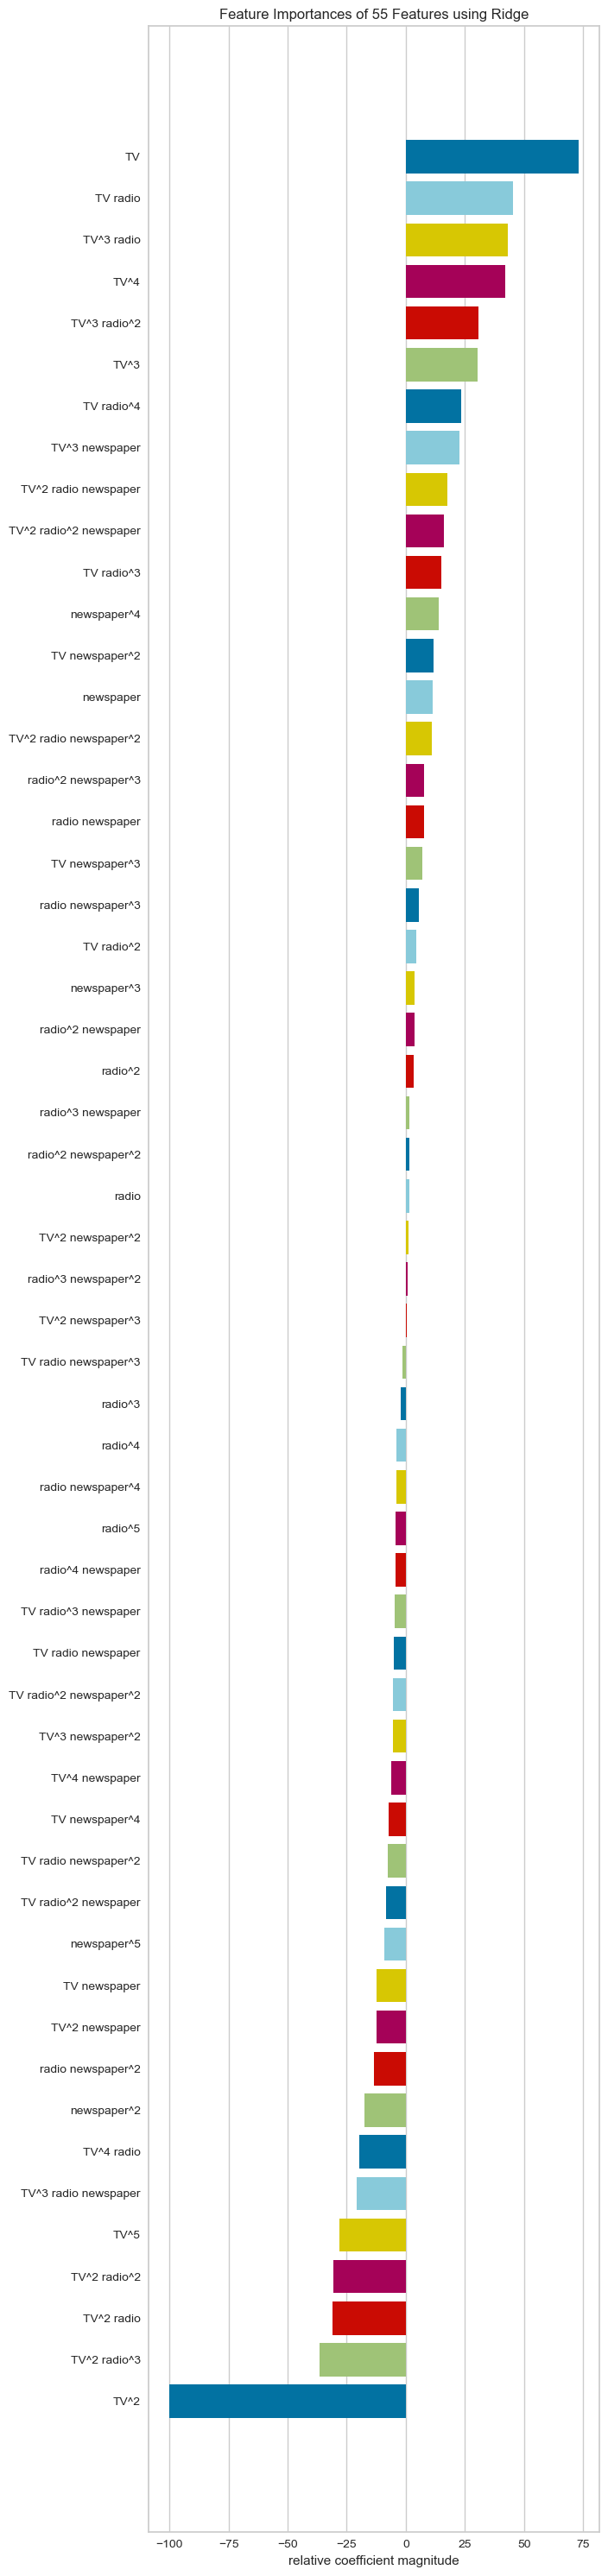

In [138]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# We can use the FeatureImportances class from yellowbrick.model_selection to visualise the importances of our features.
# Here we instantiate a new ridge model with the best performing hyperparameters for the specified model. (alpha=0.02).


# visualizer = RadViz(size=(720, 3000)) helps us change the size of the resulting graph.

## Feature importances with Lasso

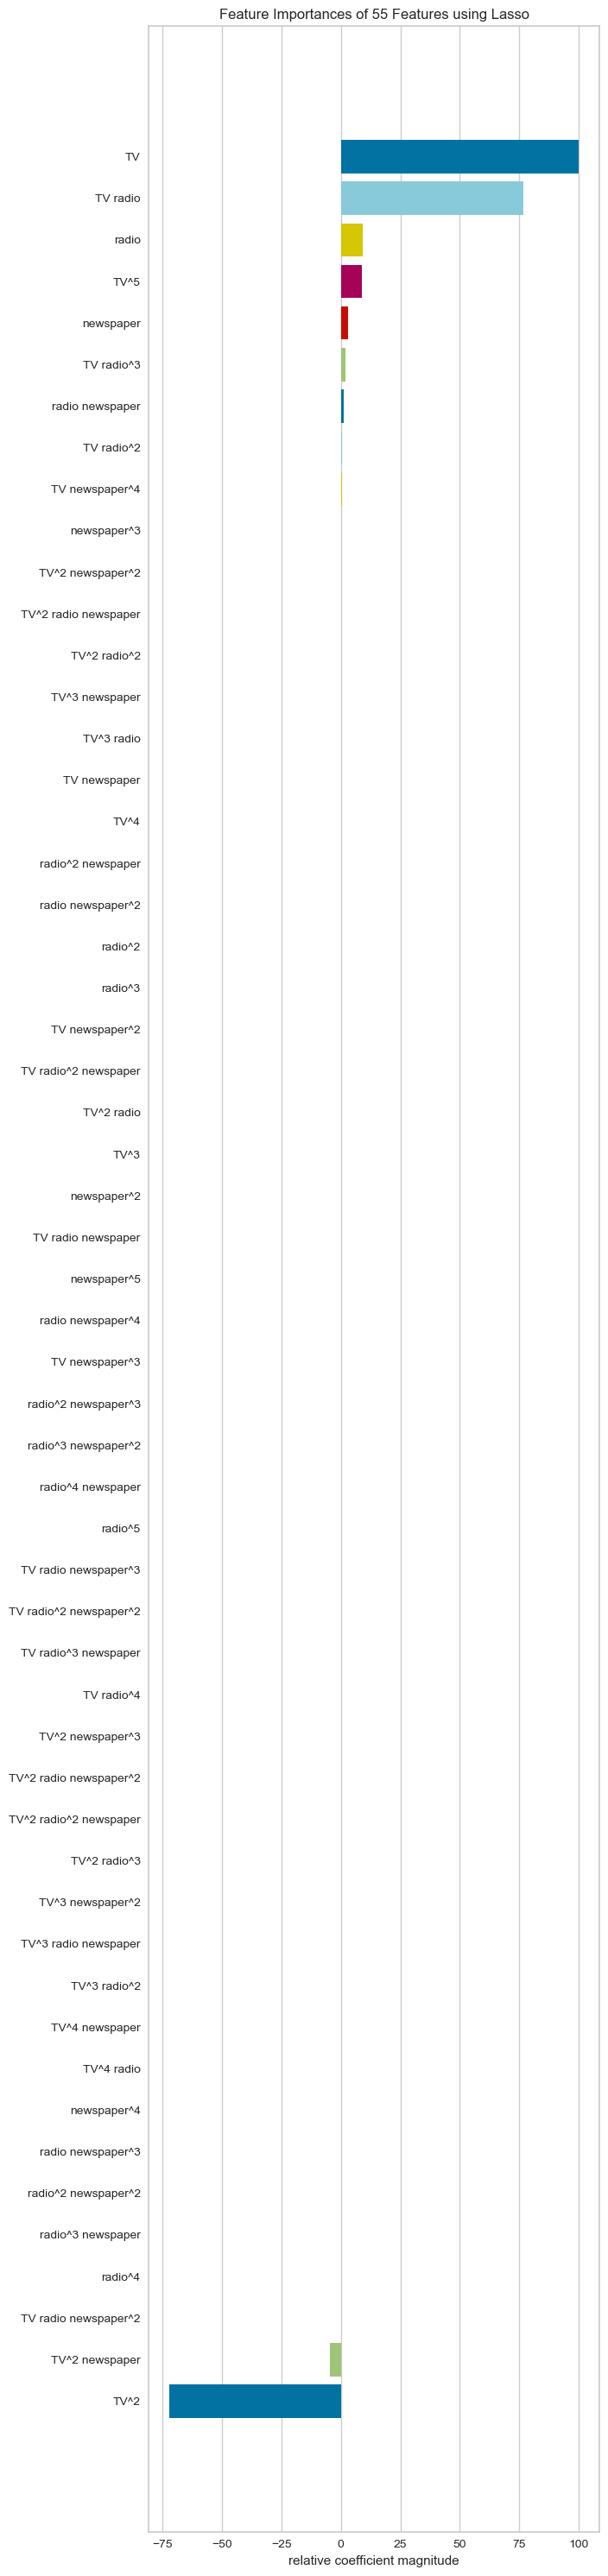

In [139]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# This time we try the same thing with lasso.

## Feature Selection

In [140]:
X_new = pd.DataFrame(poly_features)[["TV", "TV^2", "TV radio"]]
X_new

# We are selecting the most important features according to the graph above.

,TV,TV^2,TV radio
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [141]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [142]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

# train and test sets are scaled according to the train data info.

In [143]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

# Train the best performing model on the new dataset this time (with 3 features)

Lasso(alpha=0.01)

In [144]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [145]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

# We are actually getting very good scores considering we only used 3 independent features.

,lasso_new_train,lasso_new_test
R2,0.982056,0.987284
mae,0.429271,0.515009
mse,0.465402,0.401370
rmse,0.682204,0.633538
mape,0.058372,0.050702


## For Lasso alpha values < 0.01, scores are very close to 0.01 alpha scores

In [146]:
lasso_model2 = Lasso(max_iter=1000000, alpha=0.001)

# if you remember from the elasticnet model, the best performing alpha value was actually the lower limit of your alpha space. So, what if we had lower values than that? 
# Would we have gotten better scores? Let's see. Train a model with alpha=0.001

In [147]:
lasso_model2.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=1000000)

In [148]:
y_pred = lasso_model2.predict(X_test_scaled)
y_train_pred = lasso_model2.predict(X_train_scaled)

In [149]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso_001")

# As you can see, we got little better scores, at the expense of using 10 more independent features.

,lasso_001_train,lasso_001_test
R2,0.992339,0.991810
mae,0.290686,0.343706
mse,0.198689,0.258493
rmse,0.445746,0.508422
mape,0.037575,0.031207


In [150]:
lasso_model2.coef_ #21 feature
# This is a trade-off that you, as a data scientist/ML engineer, have to decide.
# If you are dealing with a health related problem and even the smallest gain in scores counts, then obviously go for the most accurate model. 
# But if a small gain in scores doesn't really justify the use of 10 more independent features, you can go with the smaller model which gives comparable results.

array([  7.89061693,   0.33668296,   0.35602312, -12.66643218,
         3.94241649,  -0.72462246,   0.        ,   0.27745939,
        -0.        ,   7.58090336,  -0.01549864,   0.        ,
         0.        ,  -0.41254903,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.46843998,  -0.4171685 ,   0.        ,
         0.20756791,   0.30918104,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -1.06042396,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.35431863,   0.        ,   0.        ,   0.        ,
         0.51367316,  -0.03312509,  -0.        ,   0.        ,
        -0.        ,  -0.27141665,  -0.        ,   0.        ,
         0.05685782,   0.        ,  -0.14749064])

END OF THE PROJECT